<img src= "https://c.tenor.com/QJNoPeq9WmUAAAAC/netflix-intro-netflix.gif" width="600" >

# Netflix Movie/TV Show Content Analysis #



### After looking through many datasets, Netflix, which is one of the largest streaming platforms, seemed like something interesting to look into.

## I wanted to answer the following questions:
* How much content is added to Netflix each year? What does the trend look like?
* What are the most popular movie and tv show genres on Netflix?
* Where is most of the content produced?

## Below is the data dictionary for this dataset:

| Field | Description |
| :-- | :-- |
| **show_id** | Primary key for every movie/tv show
| **type** | Categorizes the content as either a TV show or a Movie
| **title** | Title of the Netflix content
| **director** | Name of person(s) who directed the movie
| **cast** | Actors/Actresses involved in the movie/tv show
| **country** | Country where the movie/show was produced
| **date_added** | Date it was added to Netflix
| **release_year** | Year the movie/show was originally released
| **rating** | Rating of the movie/show
| **listed_in** | Genre of the movie/show
| **description** | Brief description of the movie/show

In [8]:
import pandas as pd

In [9]:
net = pd.read_csv('netflix_titles.csv')
net.isna().sum()
net.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
net.date_added=pd.to_datetime(net.date_added)

In [11]:
net['added_year']=net.date_added.dt.year #to make new column called added_year

In [12]:
netf=net.groupby('added_year').agg({'show_id':'count'}).sort_values('show_id',ascending=False)
netf

,show_id
added_year,
2019.0,2016
2020.0,1879
2018.0,1649
2021.0,1498
2017.0,1188
2016.0,429
2015.0,82
2014.0,24
2011.0,13


In [13]:
import seaborn as sns

<AxesSubplot:xlabel='added_year', ylabel='show_id'>

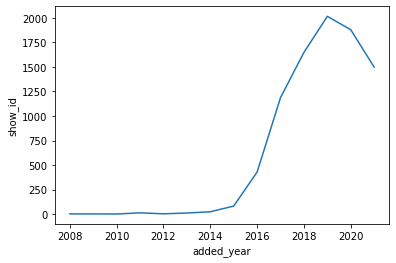

In [14]:
sns.lineplot(data=netf,x='added_year',y='show_id')

In [15]:
#q2
net['main_gener']=net['listed_in'].apply(lambda x:x.split(',')[0])

In [16]:
'Dramas, Independent Movies, International Movies'.split(',')[0]

'Dramas'

In [17]:
net_movie = net[net.type=='Movie']
net_tv = net[net.type=='TV Show']

In [18]:
netm=net_movie.groupby('main_gener').agg({'show_id':'count'}).sort_values('show_id',ascending=False).reset_index() 
netm

,main_gener,show_id
0,Dramas,1600
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,Children & Family Movies,605
5,Stand-Up Comedy,334
6,Horror Movies,275
7,International Movies,128
8,Classic Movies,80
9,Thrillers,65


<AxesSubplot:xlabel='show_id', ylabel='main_gener'>

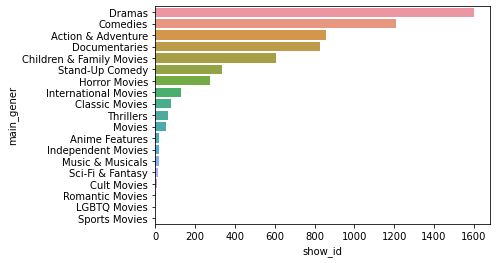

In [20]:
sns.barplot(data=netm ,x='show_id',y='main_gener')